<a href="https://colab.research.google.com/github/RaffyJO/PCVK_Ganjil_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modul 7 - Praktikum Filter**

Nama : Raffy Jamil Octavialdy
<br>
Kelas : TI - 3D
<br>
NIM : 2241720082

 Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


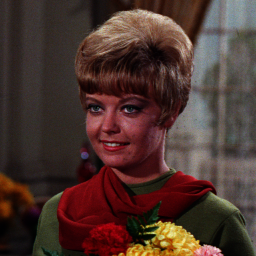

In [18]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math

img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
cv2_imshow(img)

Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel dan padding.

In [19]:
def conv2D(image, kernel, strides=1, padding=0):
  kernel = np.flipud(np.fliplr(kernel))
  xKernelShape = kernel.shape[0]
  yKernelShape = kernel.shape[1]
  xImageShape = image.shape[0]
  yImageShape = image.shape[1]

  xOutput = int(((xImageShape - xKernelShape + 2 * padding) / strides) + 1)
  yOutput = int(((yImageShape - yKernelShape + 2 * padding) / strides) + 1)

  output = np.zeros((xOutput, yOutput, image.shape[2]))

  if padding != 0:
    imagePadding = np.zeros((xImageShape + padding * 2, yImageShape + padding * 2, image.shape[2]))
    imagePadding[int(padding) : int(-1 * padding), int(padding) : int(-1 * padding)] = image
  else:
    imagePadding = image

  for y in range(yImageShape):
    if y > yImageShape - yKernelShape:
      break

    if y % strides == 0:
      for x in range(xImageShape):
        if x > xImageShape - xKernelShape:
          break
        try:
          if x % strides == 0:
            for channel in range(image.shape[2]):
              output[x, y, channel] = (kernel * imagePadding[x: x + xKernelShape, y: y + yKernelShape, channel]).sum()
        except:
          break
  return output

Tentukan kernel yang akan digunakan.

In [20]:
average = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
lowpass = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
highpass = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
leftsobeledgedetection = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
cannyedgedetection = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
prewitt = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
gaussian5 = np.array([[1,4,6,4,1],
                        [4,16,24,16,4],
                        [6,24,36,24,6],
                        [4,16,24,16,4],
                        [1,4,6,4,1]])/256
sigma = math.sqrt(21)
gaussian_kernel = cv.getGaussianKernel(21, sigma)
gaussian21 = gaussian_kernel @ gaussian_kernel.transpose()

Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya

In [21]:
average_img = conv2D(img, average, 1, 2)
lowpass_img = conv2D(img, lowpass, 1, 2)
highpass_img = conv2D(img, highpass, 1, 2)
sharpen_img = conv2D(img, sharpen, 1, 2)
emboss_img = conv2D(img, emboss, 1, 2)
leftsobeledgedetection_img = conv2D(img, leftsobeledgedetection, 1, 2)
cannyedgedetection_img = conv2D(img, cannyedgedetection, 1, 2)
prewitt_img = conv2D(img, prewitt, 1, 2)
gaussian5_img = conv2D(img, gaussian5, 1, 2)
gaussian21_img = conv2D(img, gaussian21, 1, 2)

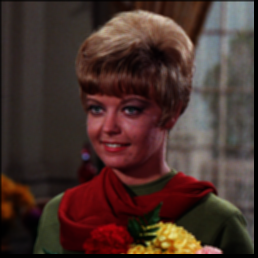

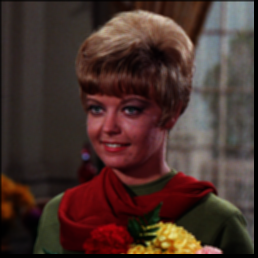

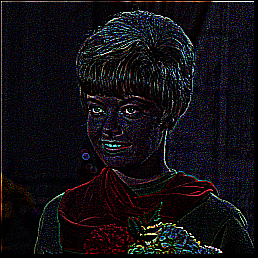

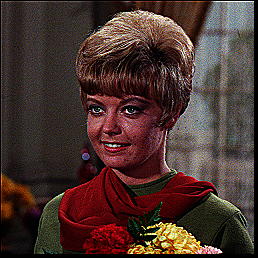

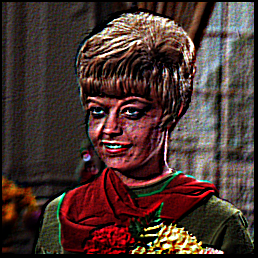

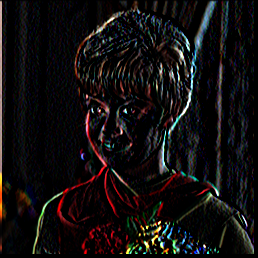

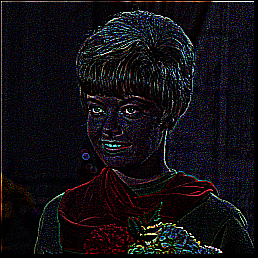

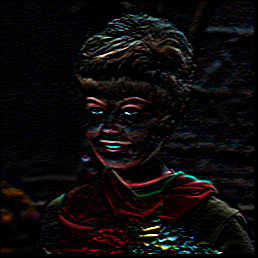

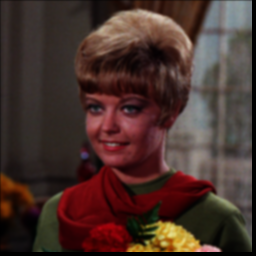

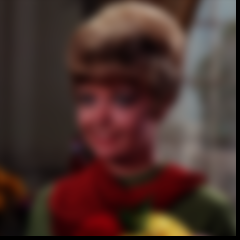

In [22]:
cv2_imshow(average_img)
cv2_imshow(lowpass_img)
cv2_imshow(highpass_img)
cv2_imshow(sharpen_img)
cv2_imshow(emboss_img)
cv2_imshow(leftsobeledgedetection_img)
cv2_imshow(cannyedgedetection_img)
cv2_imshow(prewitt_img)
cv2_imshow(gaussian5_img)
cv2_imshow(gaussian21_img)